import libraries

In [1]:

# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from collections import Counter

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

Loading Data

In [2]:
data = pd.read_csv('diabetes.csv')

Explorating Data Anaylsis **bold text**

In [3]:
data.head()
data.tail()
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
552,6,114,88,0,0,27.8,0.247,66,0
557,8,110,76,0,0,27.8,0.237,58,0
302,5,77,82,41,42,35.8,0.156,35,0
508,2,84,50,23,76,30.4,0.968,21,0
636,5,104,74,0,0,28.8,0.153,48,0
330,8,118,72,19,0,23.1,1.476,46,0
226,0,101,76,0,0,35.7,0.198,26,0
374,2,122,52,43,158,36.2,0.816,28,0
160,4,151,90,38,0,29.7,0.294,36,0
368,3,81,86,16,66,27.5,0.306,22,0


“This dataset consists of 768 rows and 9 columns.

In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [7]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
data.duplicated().sum()

np.int64(0)

Finding Missing Value in dataset

In [9]:
print(data[data['BloodPressure']==0].shape[0])
print(data[data['BMI']==0].shape[0])
print(data[data['Insulin']==0].shape[0])
print(data[data['Glucose']==0].shape[0])
print(data[data['SkinThickness']==0].shape[0])

35
11
374
5
227


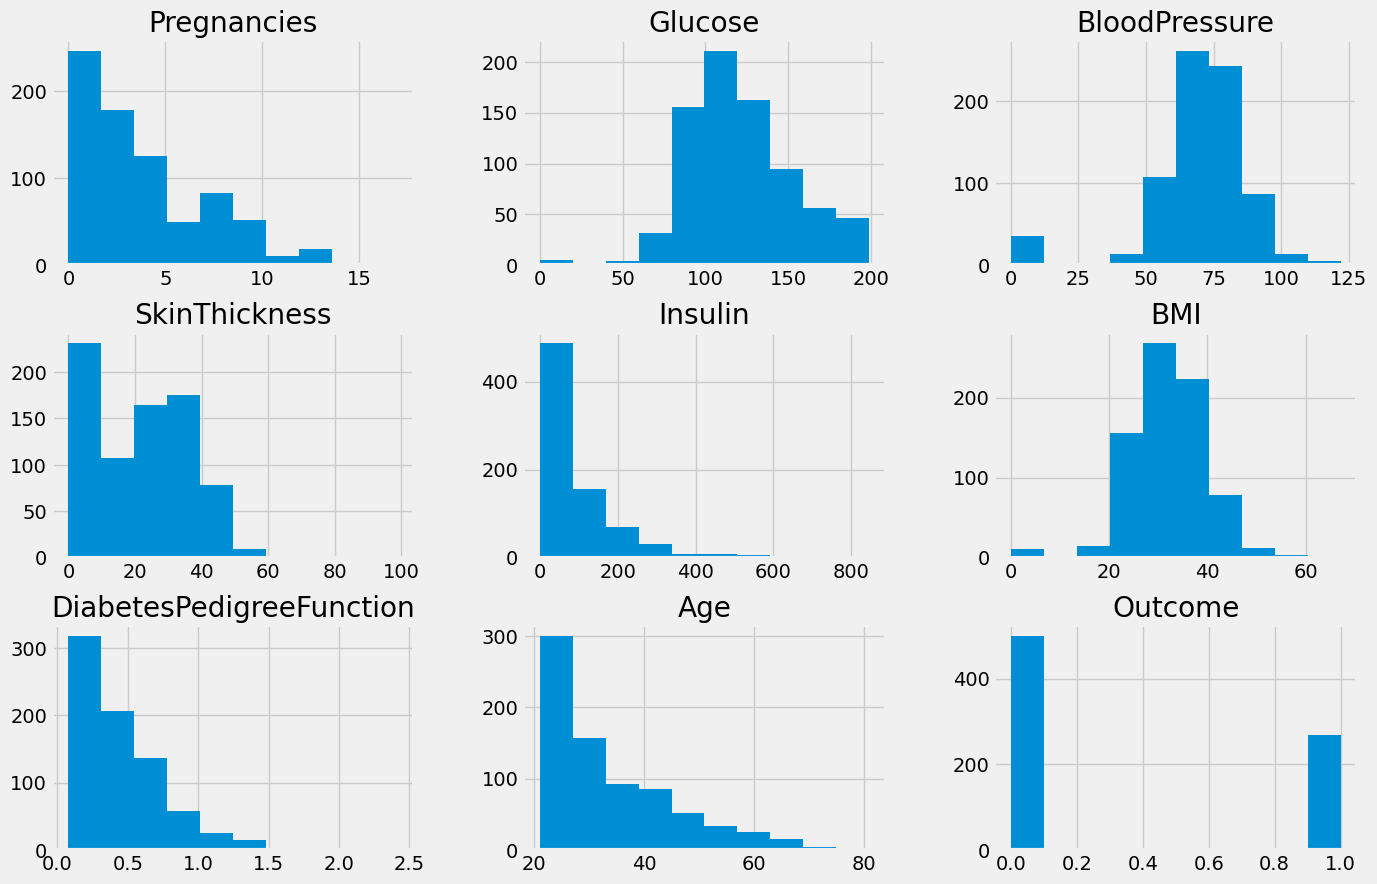

In [10]:
data.hist(bins=10,figsize=(15,10))
plt.show()

In [11]:
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

After We Handling missing Value

In [12]:
print(data[data['BloodPressure']==0].shape[0])
print(data[data['BMI']==0].shape[0])
print(data[data['Insulin']==0].shape[0])
print(data[data['Glucose']==0].shape[0])
print(data[data['SkinThickness']==0].shape[0])

0
0
0
0
0


### Measures relationships

Correlation values close to +1 indicate a strong positive linear relationship, values close to -1 indicate a strong negative linear relationship, and values around 0 suggest no significant linear relationship between the features.



In [13]:
data.corr().round(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.0,0.1,0.2,0.0,-0.0,0.0,-0.0,0.5,0.2
Glucose,0.1,1.0,0.2,0.2,0.4,0.2,0.1,0.3,0.5
BloodPressure,0.2,0.2,1.0,0.1,0.0,0.3,0.0,0.3,0.2
SkinThickness,0.0,0.2,0.1,1.0,0.2,0.5,0.2,0.0,0.2
Insulin,-0.0,0.4,0.0,0.2,1.0,0.2,0.2,0.0,0.2
BMI,0.0,0.2,0.3,0.5,0.2,1.0,0.2,0.0,0.3
DiabetesPedigreeFunction,-0.0,0.1,0.0,0.2,0.2,0.2,1.0,0.0,0.2
Age,0.5,0.3,0.3,0.0,0.0,0.0,0.0,1.0,0.2
Outcome,0.2,0.5,0.2,0.2,0.2,0.3,0.2,0.2,1.0


<Axes: >

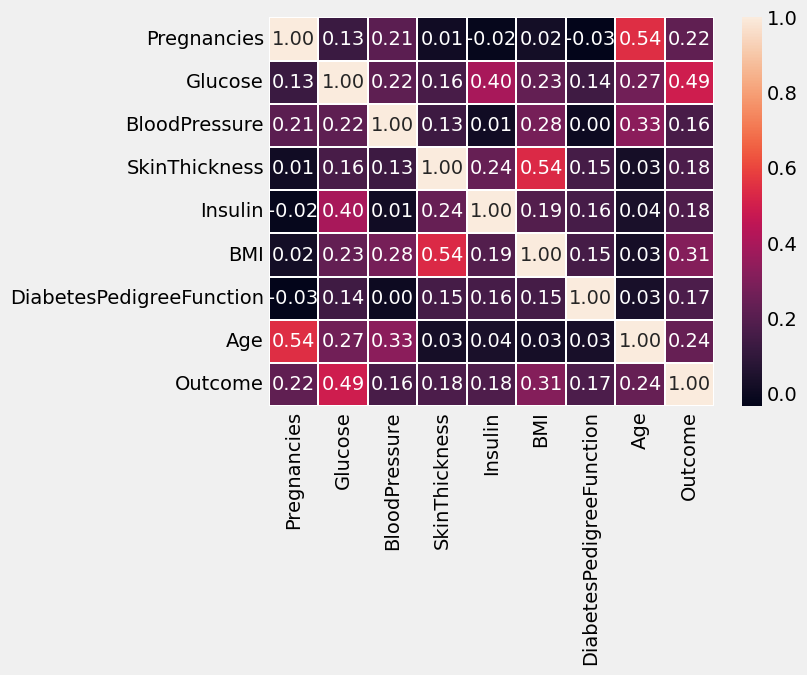

In [14]:
sns.heatmap(data.corr(),annot=True,linewidths=0.3,fmt='0.2f')


# Feature selection

In [15]:
#data =data.drop('Insulin',axis=0)

## Exploring outcome

<Axes: xlabel='Outcome', ylabel='count'>

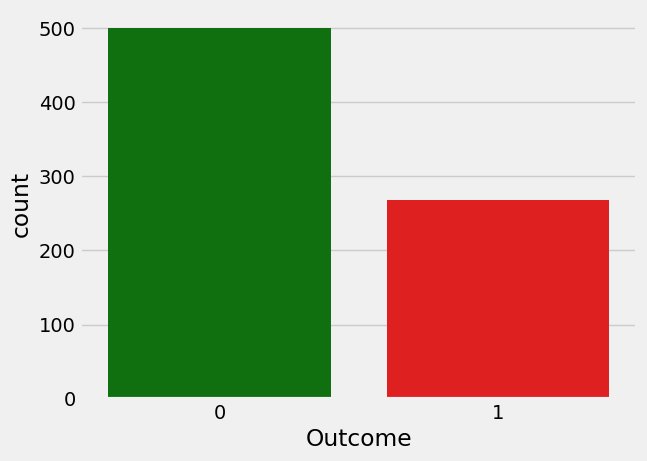

In [16]:
sns.countplot(x='Outcome', data= data,palette = ['g','r'])

# Percentage of Patient with diabetes

In [17]:
maxi =data[data['Outcome']==0]
mini =data[data['Outcome']==1]
maxi.shape[0] # = 500
mini.shape[0] # = 268
percentage=mini.shape[0]/(mini.shape[0]+maxi.shape[0])
print(f"{percentage*100:.1f}%")

34.9%


## Exploring Outliers

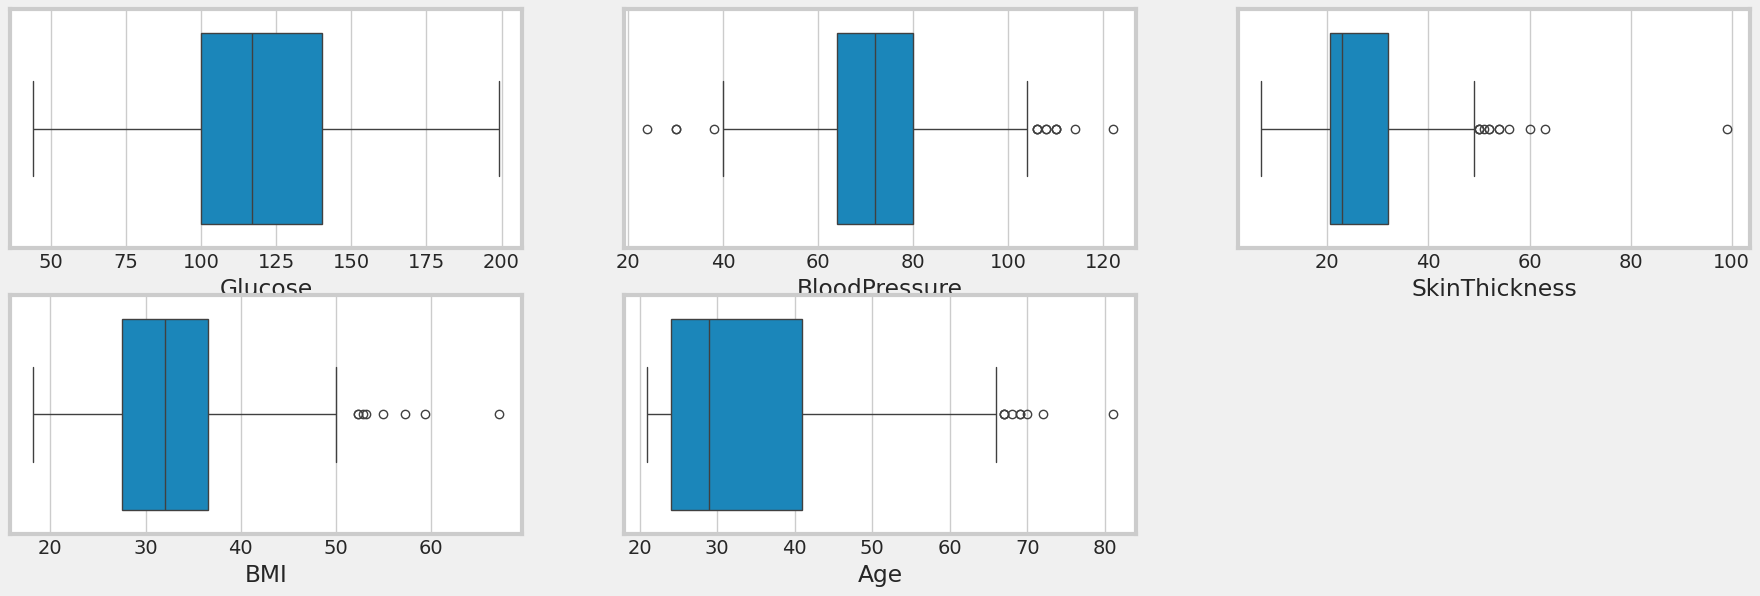

In [18]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')

features = ['Glucose','BloodPressure','SkinThickness','BMI','Age']

for i, col in enumerate(features, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x=col, data=data)

plt.show()


### Create Model

In [19]:
x = data.drop('Outcome',axis=1)
y =data['Outcome']

In [20]:
rm = RandomOverSampler(random_state=42)
x_res , y_res = rm.fit_resample(x,y)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [22]:

model1=LogisticRegression()
model2=SVC()
model3=RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 500)
model4=GradientBoostingClassifier(n_estimators=1000)
model5=KNeighborsClassifier()
model6=GaussianNB()
model7=DecisionTreeClassifier()

In [23]:
col = ['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier','GaussianNB','DecisionTreeClassifier']
result1=[]
result2=[]
result3=[]
result4=[]


In [24]:
def cal(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    precision=precision_score(pre,y_test)
    f1=f1_score(pre,y_test)

    result1.append(accuracy)
    result2.append(recall)
    result3.append(precision)
    result4.append(f1)

    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print('accuracy is : ',accuracy,'recall is :',recall,'precision is :',precision,'f1 is :' ,f1)

LogisticRegression()
accuracy is :  0.725 recall is : 0.7254901960784313 precision is : 0.7326732673267327 f1 is : 0.729064039408867


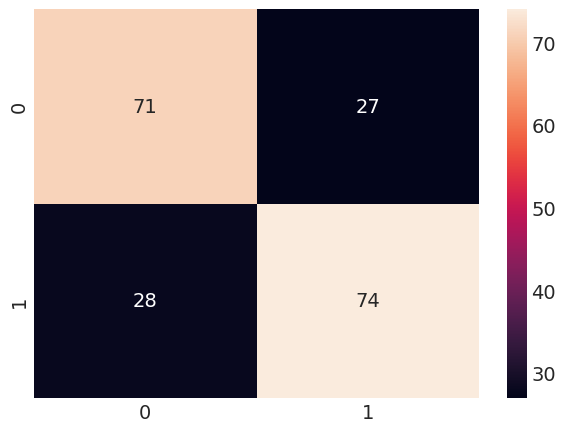

In [25]:
cal(model1)

SVC()
accuracy is :  0.725 recall is : 0.7446808510638298 precision is : 0.693069306930693 f1 is : 0.717948717948718


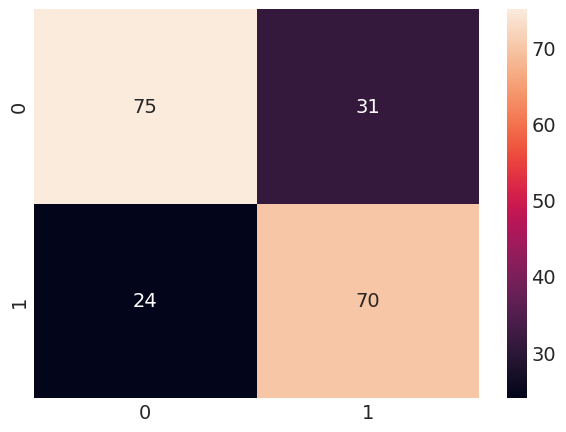

In [26]:
cal(model2)

RandomForestClassifier(n_estimators=500)
accuracy is :  0.83 recall is : 0.7964601769911505 precision is : 0.8910891089108911 f1 is : 0.8411214953271028


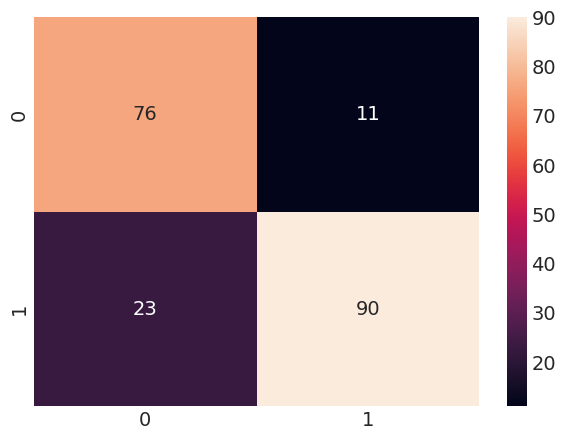

In [27]:
cal(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is :  0.81 recall is : 0.7739130434782608 precision is : 0.8811881188118812 f1 is : 0.8240740740740741


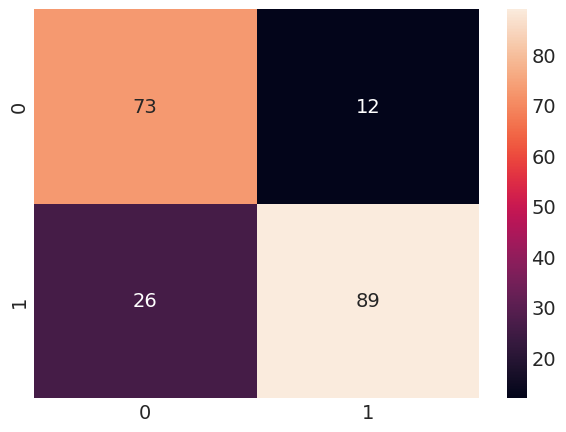

In [28]:
cal(model4)

KNeighborsClassifier()
accuracy is :  0.73 recall is : 0.7155963302752294 precision is : 0.7722772277227723 f1 is : 0.7428571428571429


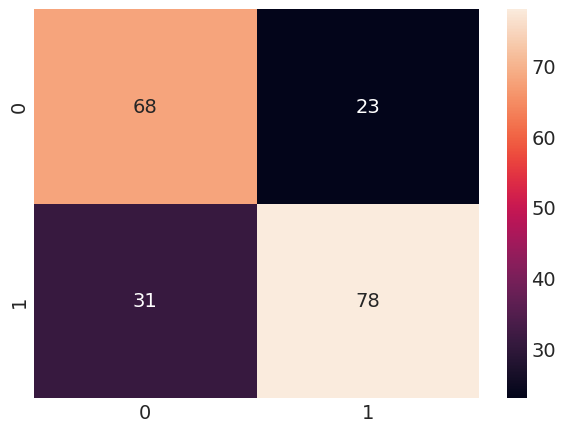

In [29]:
cal(model5)

GaussianNB()
accuracy is :  0.75 recall is : 0.7802197802197802 precision is : 0.7029702970297029 f1 is : 0.7395833333333334


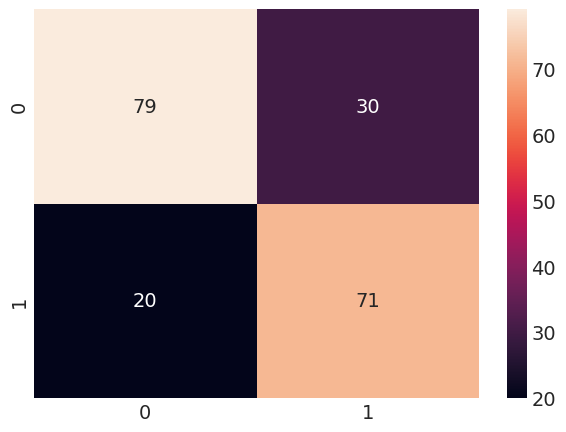

In [30]:
cal(model6)

DecisionTreeClassifier()
accuracy is :  0.81 recall is : 0.7692307692307693 precision is : 0.8910891089108911 f1 is : 0.8256880733944955


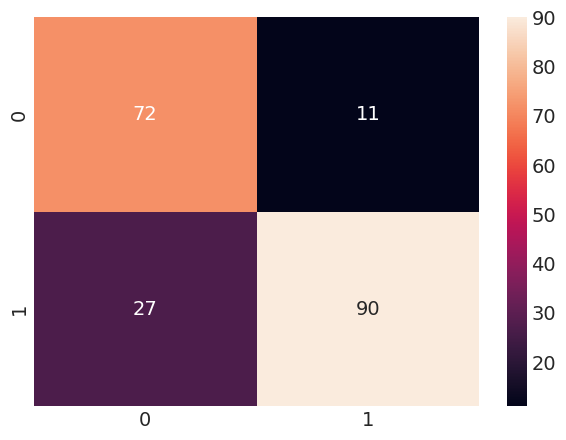

In [31]:
cal(model7)

## Final Result

In [32]:
final_result=pd.DataFrame({'Algorithms':col , 'Accuracies':result1[:len(col)],'Recall':result2[:len(col)],'precision':result3[:len(col)],'F1_Score':result4[:len(col)]})

In [33]:
final_result

,Algorithms,Accuracies,Recall,precision,F1_Score
0,LogisticRegression,0.725,0.725490,0.732673,0.729064
1,SVC,0.725,0.744681,0.693069,0.717949
2,RandomForestClassifier,0.830,0.796460,0.891089,0.841121
3,GradientBoostingClassifier,0.810,0.773913,0.881188,0.824074
4,KNeighborsClassifier,0.730,0.715596,0.772277,0.742857
5,GaussianNB,0.750,0.780220,0.702970,0.739583
6,DecisionTreeClassifier,0.810,0.769231,0.891089,0.825688


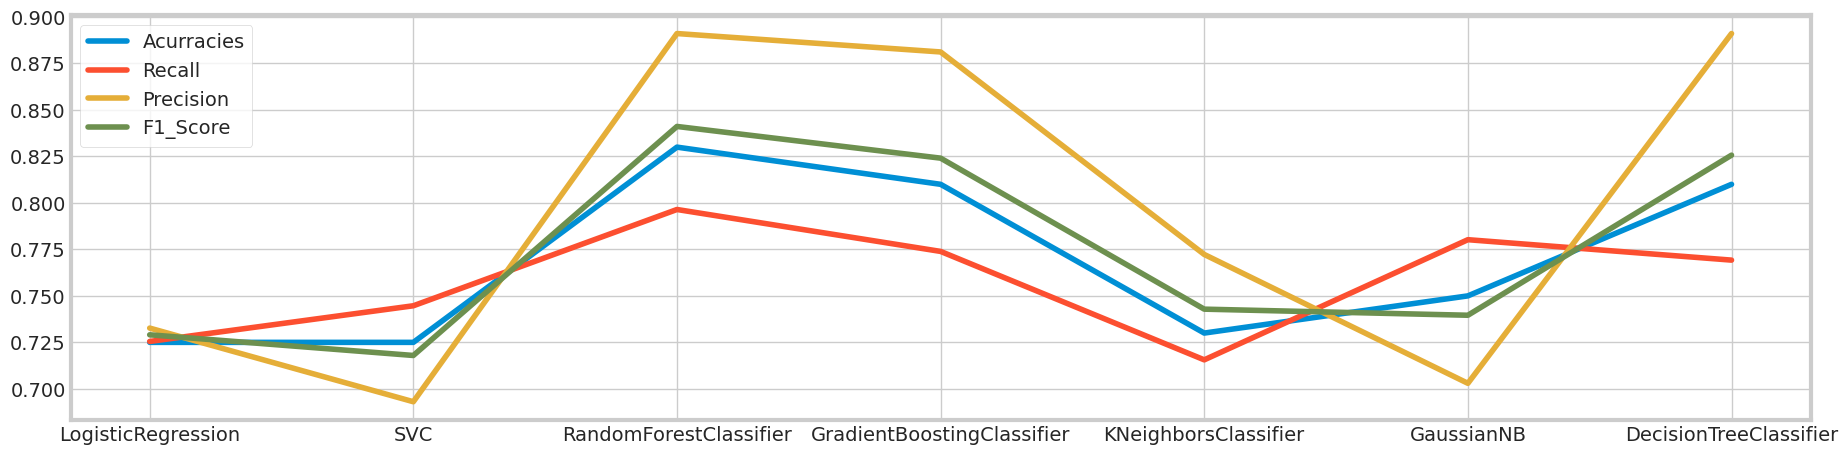

In [40]:
fig,ax= plt.subplots(figsize=(20,5))
plt.plot(final_result.Algorithms , result1 ,label= 'Acurracies')
plt.plot(final_result.Algorithms , result2 ,label= 'Recall')
plt.plot(final_result.Algorithms , result3 ,label= 'Precision')
plt.plot(final_result.Algorithms , result4 ,label= 'F1_Score')
plt.legend()
plt.show()